In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

plt.style.use(["science","grid"])

In [2]:
data_batch = pd.read_feather("sampling_base_batch")
input_vars_batch = pd.read_csv("input_parameters_batch.csv")

data_15 = pd.read_feather("sampling_base_15")
input_vars_15 = pd.read_csv("input_parameters_15.csv")

# Supporting functions
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs
    
gammas = [3,7]
gammas_name = ["high","low"]
scs = [6.0,7.8]
scs_name = ["low",'high']

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gs = [  [3 , 7.8] ,[7 , 6.0] ]
t={}
t[3]=0
t[7]=1

## Unsatisfied consumption

In [3]:
# # dict to store relevant indices
# d = {}
# d[0] = input_vars[input_vars.gamma==3].index
# d[1] = input_vars[input_vars.gamma==7].index
# d[2] = input_vars[input_vars.gamma==14].index

# fig, ax = plt.subplots(1,2,figsize=(15,5))
           
# # x vector to plot            
# x = np.linspace(0,4319,4320) 
# colors = ['steelblue','chocolate','yellowgreen']
# lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
# labels = [r'$\gamma$ = 3', r'$\gamma$ = 7', r'$\gamma$ = 21']

# for i in d:    
#     for j in d[i]:
#         if input_vars.parallel_served_full[j] == 6.0:
#             ax[0].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
#             ax[0].set_title("6.0 people served per 10 minutes")
#         else:
#             ax[1].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
#             ax[1].set_title("7.8 people served per 10 minutes")
      
# for a in ax:
#     a.set_xticks(ticks_labels(5)[0])
#     a.set_xticklabels(ticks_labels(5)[1],fontsize=12)
#     a.set_xlim([0,4320])
#     a.set_ylim([-200,100000])
#     a.legend(lines, labels,loc='upper left',fontsize=12)
#     a.set_ylabel("Unsatisfied consumption (kg)",fontsize=12)

# # plt.savefig("/home/daan/Desktop/uc_over_time.png")

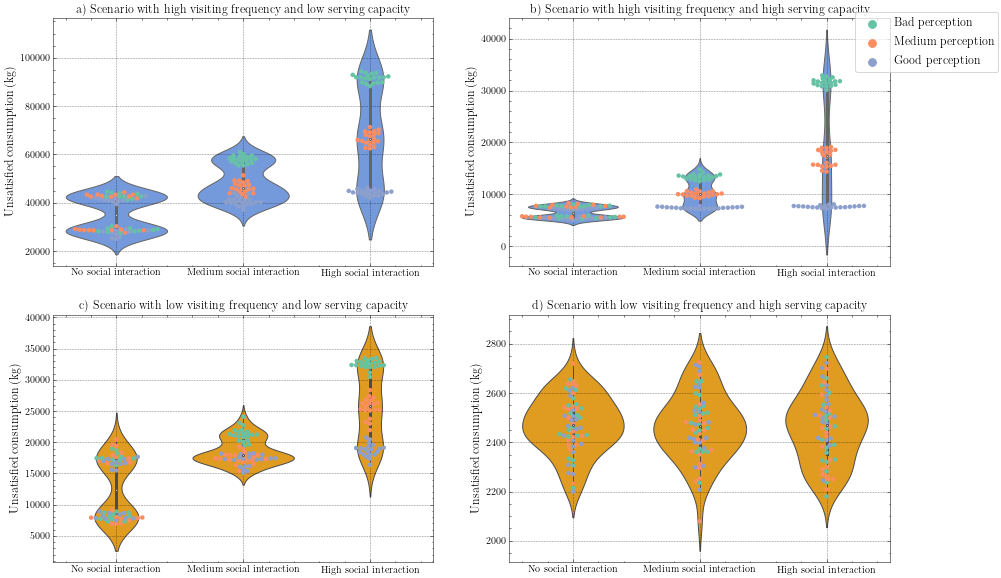

In [4]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()

for j in input_vars_batch.index:
    uc_endvals_dict["unsatisfied consumption"].append(data_batch.o1[data_batch.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)



for s in range(len(scs)):
    
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Set2',size=4.5)#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
                   
        ax[g,s].set_ylabel("Unsatisfied consumption (kg)",fontsize=12)
        ax[g,s].set_xlabel(None)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles = ax[g,s].get_legend_handles_labels()[0]
#         ax[g,s].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
        ax[g,s].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
        ax[g,s].yaxis.grid(True) # Hide the horizontal gridlines
        ax[g,s].xaxis.grid(True) # Show the vertical gridlines
        ax[g,s].get_legend().remove()


ax[0,0].set_title("a) Scenario with high visiting frequency and low serving capacity")
ax[0,1].set_title("b) Scenario with high visiting frequency and high serving capacity")
ax[1,0].set_title("c) Scenario with low visiting frequency and low serving capacity")
ax[1,1].set_title("d) Scenario with low visiting frequency and high serving capacity")
ax[0,1].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);
       


# plt.savefig("/home/daan/Desktop/uc_epsilon_full.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-5-32c9be0b9573>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.linspace(0,40,9))
<ipython-input-5-32c9be0b9573>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.linspace(0,40,9))


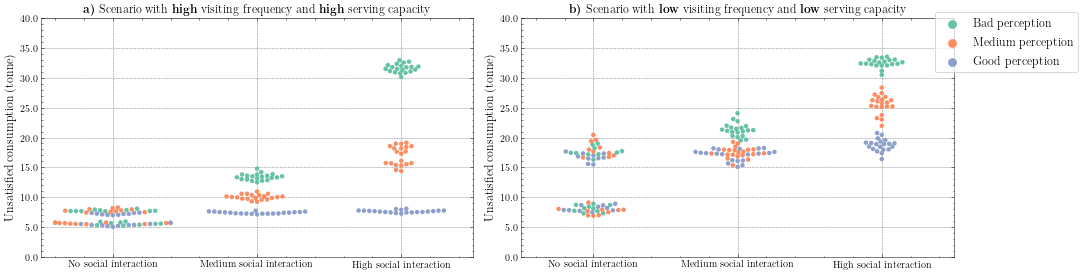

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Set2',size=4.5)#palette=my_palette['dark'])
#     sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,40e3])
    ax[i].set_ylabel("Unsatisfied consumption (tonne)",fontsize=12);
    
    ax[i].set_xlabel(None)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
    handles = ax[i].get_legend_handles_labels()[0]
#         ax[g,s].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
    ax[i].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
    ax[i].set_yticklabels(np.linspace(0,40,9))
    ax[i].yaxis.grid(True) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines
    ax[i].get_legend().remove()




ax[i].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);

ax[0].set_title(r"\textbf{a)} Scenario with \textbf{high} visiting frequency and \textbf{high} serving capacity")
ax[1].set_title(r"\textbf{b)} Scenario with \textbf{low} visiting frequency and \textbf{low} serving capacity")
fig.tight_layout() 
plt.savefig("/home/daan/Desktop/scenariodiscovery_uc_epsilon.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-6-0648ebce9150>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.linspace(0,40,9))
<ipython-input-6-0648ebce9150>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.linspace(0,40,9))


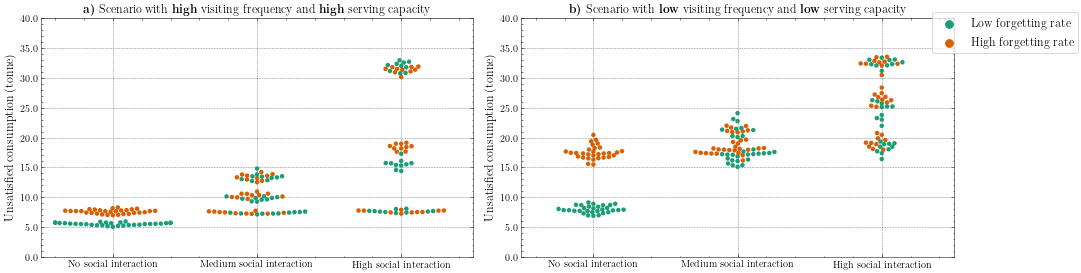

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='alpha',palette='Dark2',size=4.5)#palette=my_palette['dark'])
#     sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,40e3])
    ax[i].set_ylabel("Unsatisfied consumption (tonne)",fontsize=12);
    
    ax[i].set_xlabel(None)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
    handles = ax[i].get_legend_handles_labels()[0]
#         ax[g,s].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
    ax[i].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
    ax[i].set_yticklabels(np.linspace(0,40,9))
    ax[i].yaxis.grid(True) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines
    ax[i].get_legend().remove()

ax[i].legend(handles[:2], ["Low forgetting rate", "High forgetting rate"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);
       
ax[0].set_title(r"\textbf{a)} Scenario with \textbf{high} visiting frequency and \textbf{high} serving capacity")
ax[1].set_title(r"\textbf{b)} Scenario with \textbf{low} visiting frequency and \textbf{low} serving capacity")
fig.tight_layout() 

plt.savefig("/home/daan/Desktop/scenariodiscovery_uc_alpha.png")

## Food waste

In [7]:
# # dict to store relevant indices
# d = {}
# d[0] = input_vars_batch[input_vars_batch.gamma==3].index
# d[1] = input_vars_batch[input_vars_batch.gamma==7].index

# fig, ax = plt.subplots(1,2,figsize=(15,5))
           
# # x vector to plot            
# x = np.linspace(0,4319,4320) 
# colors = ['steelblue','chocolate','yellowgreen']
# lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
# labels = [r'$\gamma$ = 3', r'$\gamma$ = 7']#, r'$\gamma$ = 21']

# for i in d:    
#     for j in d[i]:
#         if input_vars_batch.parallel_served_full[j] == 6.0:
#             ax[0].plot( x, data_batch.o2[data_batch.o0==j],color=colors[i], alpha=.75)
#             ax[0].set_title("6.0 people served per 10 minutes")
#         else:
#             ax[1].plot( x, data_batch.o2[data_batch.o0==j],color=colors[i], alpha=.75)
#             ax[1].set_title("7.8 people served per 10 minutes")
      
# for a in ax:
#     a.set_xticks(ticks_labels(5)[0])
#     a.set_xticklabels(ticks_labels(5)[1],fontsize=12)
#     a.set_xlim([0,4320])
#     a.set_ylim([0,275e3])
#     a.set_yticks([0])
#     a.legend(lines, labels,loc='upper left',fontsize=12)
#     a.set_ylabel("Food waste (kg)",fontsize=12)

# # plt.savefig("/home/daan/Desktop/fw_over_time.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


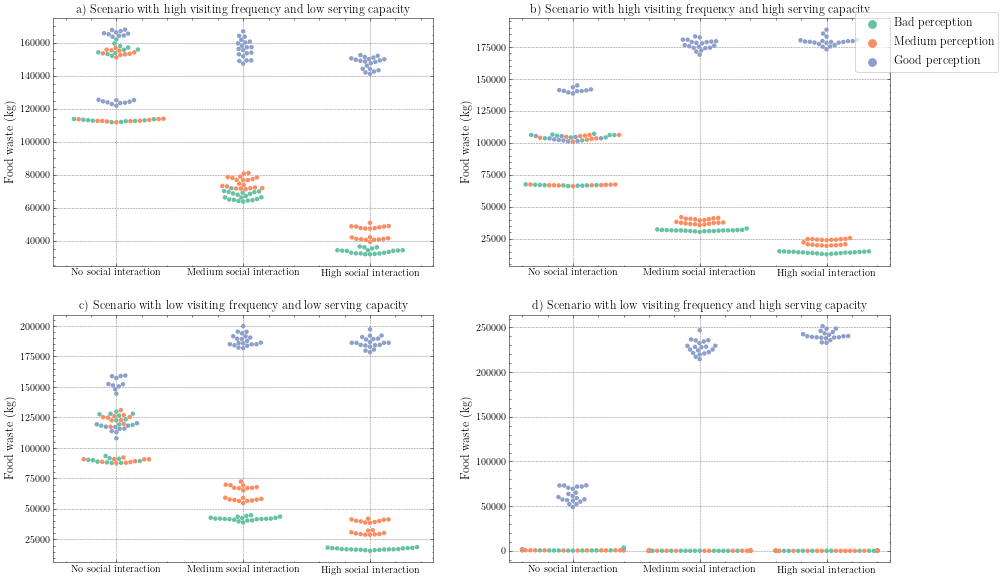

In [8]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()

for j in input_vars_batch.index:
    uc_endvals_dict["unsatisfied consumption"].append(data_batch.o2[data_batch.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)



for s in range(len(scs)):
    
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Set2',size=4.5)#palette=my_palette['dark'])
#         sns.violinplot(ax=ax[g,s], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
                   
        ax[g,s].set_ylabel("Food waste (kg)",fontsize=12)
        ax[g,s].set_xlabel(None)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles = ax[g,s].get_legend_handles_labels()[0]
#         ax[g,s].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
        ax[g,s].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
        ax[g,s].yaxis.grid(True) # Hide the horizontal gridlines
        ax[g,s].xaxis.grid(True) # Show the vertical gridlines
        ax[g,s].get_legend().remove()


ax[0,0].set_title("a) Scenario with high visiting frequency and low serving capacity")
ax[0,1].set_title("b) Scenario with high visiting frequency and high serving capacity")
ax[1,0].set_title("c) Scenario with low visiting frequency and low serving capacity")
ax[1,1].set_title("d) Scenario with low visiting frequency and high serving capacity")
ax[0,1].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);
       


# plt.savefig("/home/daan/Desktop/uc_epsilon_full.png")

In [9]:
# fig, ax = plt.subplots(2,2,figsize=(15,10))

# uc_endvals_dict = {}
# uc_endvals_dict["unsatisfied consumption"] = list()

# for j in input_vars_15.index:
#     uc_endvals_dict["unsatisfied consumption"].append(data_15.o2[data_15.o0==j].iloc[-1])
# uc_endvals_df = pd.DataFrame(uc_endvals_dict)
# input_vars_batch_filtered = pd.concat([input_vars_15,uc_endvals_df],axis=1)

# for s in range(len(scs)):
    
#     tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

#     for g in range(len(gammas)):

#         tmp2 = tmp1[tmp1.gamma==gammas[g]]
#         sns.swarmplot(ax=ax[g,s] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Accent',size=4.5)#palette=my_palette['dark'])
#         sns.violinplot(ax=ax[g,s], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
        
#         ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]),fontsize=14)
                
#         ax[g,s].set_ylabel("Unsatisfied consumption (kg)",fontsize=12)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
#         handles, labels = ax[g,s].get_legend_handles_labels()
#         ax[g,s].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)

# # plt.savefig("/home/daan/Desktop/uc_epsilon_full.png")

<ipython-input-10-ac8e800dcb6a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.linspace(0,250,6))
<ipython-input-10-ac8e800dcb6a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.linspace(0,250,6))


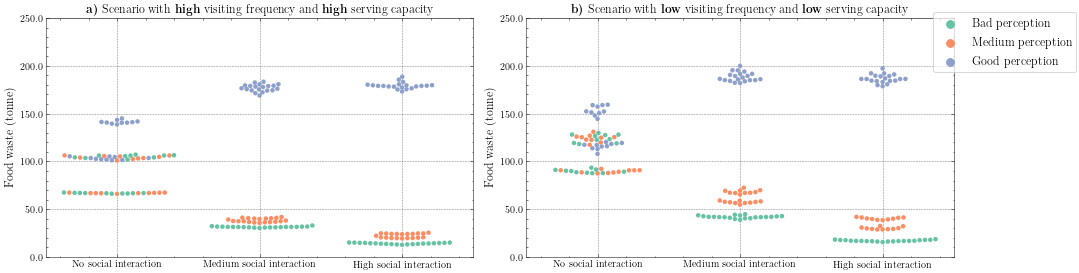

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Set2',size=4.5)#palette=my_palette['dark'])
#     sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,250e3])
    ax[i].set_ylabel("Food waste (tonne)",fontsize=12);
    
    ax[i].set_xlabel(None)
    handles = ax[i].get_legend_handles_labels()[0]
    ax[i].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
    ax[i].set_yticklabels(np.linspace(0,250,6))
    ax[i].yaxis.grid(True) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines
    ax[i].get_legend().remove()



ax[i].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);

ax[0].set_title(r"\textbf{a)} Scenario with \textbf{high} visiting frequency and \textbf{high} serving capacity")
ax[1].set_title(r"\textbf{b)} Scenario with \textbf{low} visiting frequency and \textbf{low} serving capacity")
fig.tight_layout() 

plt.savefig("/home/daan/Desktop/scenariodiscovery_fw_epsilon.png")

<ipython-input-11-a866a5280da6>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.linspace(0,250,6))
<ipython-input-11-a866a5280da6>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.linspace(0,250,6))


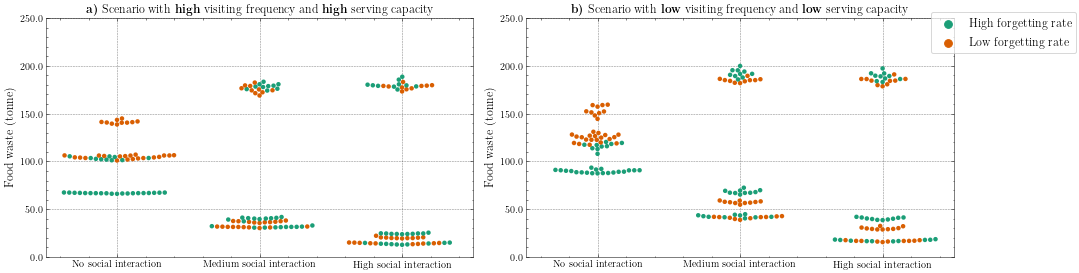

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='alpha',palette='Dark2',size=4.5)#palette=my_palette['dark'])
#     sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,250e3])
    ax[i].set_ylabel("Food waste (tonne)",fontsize=12);
    
    ax[i].set_xlabel(None)
    handles = ax[i].get_legend_handles_labels()[0]
    ax[i].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
    ax[i].set_yticklabels(np.linspace(0,250,6))
    ax[i].yaxis.grid(True) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines
    ax[i].get_legend().remove()



ax[i].legend(handles[:2], ["High forgetting rate", "Low forgetting rate"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);

ax[0].set_title(r"\textbf{a)} Scenario with \textbf{high} visiting frequency and \textbf{high} serving capacity")
ax[1].set_title(r"\textbf{b)} Scenario with \textbf{low} visiting frequency and \textbf{low} serving capacity")
fig.tight_layout() 

plt.savefig("/home/daan/Desktop/scenariodiscovery_fw_alpha.png")

## Queuing

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


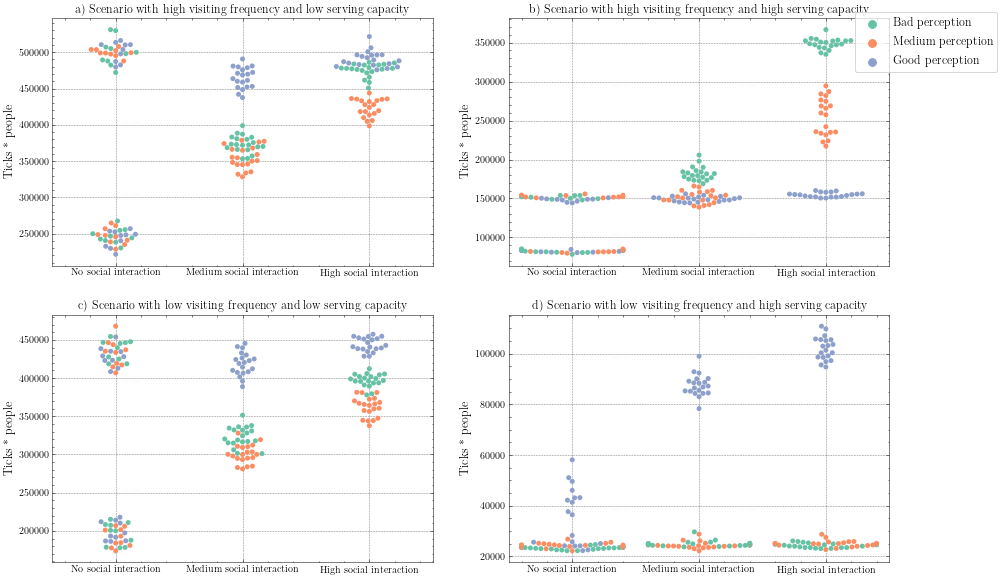

In [12]:
plt.style.use(["science","grid"])

fig, ax = plt.subplots(2,2,figsize=(15,10))
uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()

for j in input_vars_batch.index:
    uc_endvals_dict["ticks*people"].append( np.sum(data_batch[data_batch.o0==j].iloc[:,9]))

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)


my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="ticks*people", data=tmp2,hue='epsilon',palette='Set2')#palette=my_palette['dark'])
#         sns.violinplot(ax=ax[g,s], x="beta", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        
        ax[g,s].set_ylabel("Ticks * people",fontsize=12);
        ax[g,s].set_xlabel(None,fontsize=12)
        handles = ax[g,s].get_legend_handles_labels()[0]
        ax[g,s].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
        ax[g,s].yaxis.grid(True) # Hide the horizontal gridlines
        ax[g,s].xaxis.grid(True) # Show the vertical gridlines
        ax[g,s].get_legend().remove()
        

ax[0,0].set_title("a) Scenario with high visiting frequency and low serving capacity")
ax[0,1].set_title("b) Scenario with high visiting frequency and high serving capacity")
ax[1,0].set_title("c) Scenario with low visiting frequency and low serving capacity")
ax[1,1].set_title("d) Scenario with low visiting frequency and high serving capacity")
ax[0,1].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);
 

# plt.savefig("/home/daan/Desktop/queuing_onefac_epsilon_full.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-bb4b4e9dc6d9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.round(np.linspace(0,0.5,6),1))
<ipython-input-13-bb4b4e9dc6d9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.round(np.linspace(0,0.5,6),1))


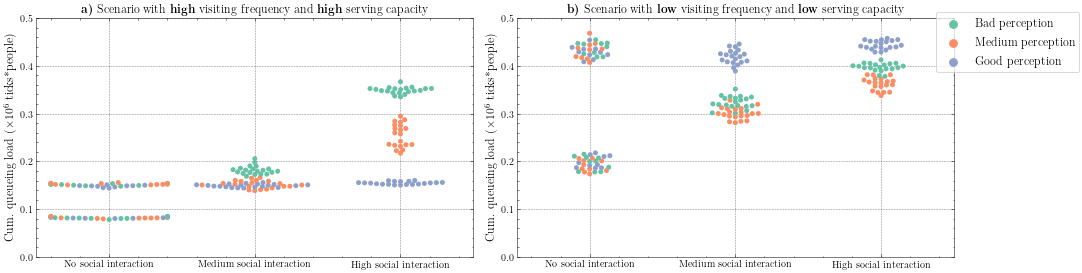

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="ticks*people", data=tmp2,hue='epsilon',palette='Set2')#palette=my_palette['dark'])
#     sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,500e3])
    ax[i].set_ylabel(r"Cum. queueing load ($\times 10^6$ ticks*people)",fontsize=12);
    
    ax[i].set_xlabel(None)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
    handles = ax[i].get_legend_handles_labels()[0]
    ax[i].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
    ax[i].set_yticklabels(np.round(np.linspace(0,0.5,6),1))
    ax[i].yaxis.grid(True) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines
    ax[i].get_legend().remove()



ax[i].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);

ax[0].set_title(r"\textbf{a)} Scenario with \textbf{high} visiting frequency and \textbf{high} serving capacity")
ax[1].set_title(r"\textbf{b)} Scenario with \textbf{low} visiting frequency and \textbf{low} serving capacity")
fig.tight_layout() 

plt.savefig("/home/daan/Desktop/scenariodiscovery_fac5_epsilon.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-16-26cd3e2c12fb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.round(np.linspace(0,0.5,6),1))
<ipython-input-16-26cd3e2c12fb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(np.round(np.linspace(0,0.5,6),1))


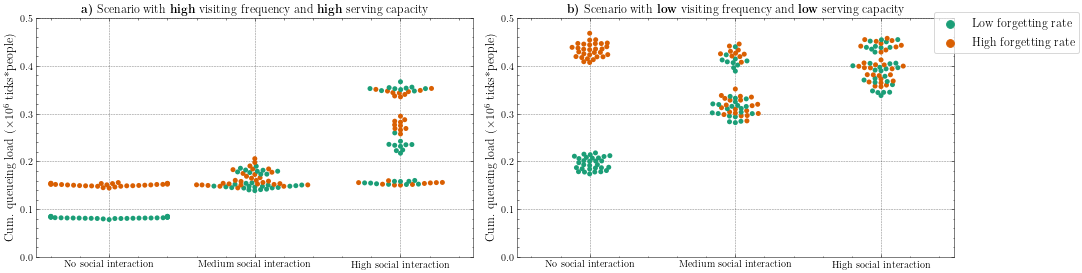

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="ticks*people", data=tmp2,hue='alpha',palette='Dark2')#palette=my_palette['dark'])
#     sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,500e3])
    ax[i].set_ylabel(r"Cum. queueing load ($\times 10^6$ ticks*people)",fontsize=12);
    
    ax[i].set_xlabel(None)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
    handles = ax[i].get_legend_handles_labels()[0]
    ax[i].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
    ax[i].set_yticklabels(np.round(np.linspace(0,0.5,6),1))
    ax[i].yaxis.grid(True) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines
    ax[i].get_legend().remove()

ax[i].legend(handles[:3], ["Low forgetting rate", "High forgetting rate"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);
ax[0].set_title(r"\textbf{a)} Scenario with \textbf{high} visiting frequency and \textbf{high} serving capacity")
ax[1].set_title(r"\textbf{b)} Scenario with \textbf{low} visiting frequency and \textbf{low} serving capacity")
fig.tight_layout() 

plt.savefig("/home/daan/Desktop/scenariodiscovery_fac5_alpha.png")

## Queuing 2 

In [59]:
q_sum = list()
n_facs = 12
for j in input_vars_batch.index:
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data_batch[data_batch.o0==j].iloc[:,i+4]))  
    
    q_sum.append(tmp_sum)    

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


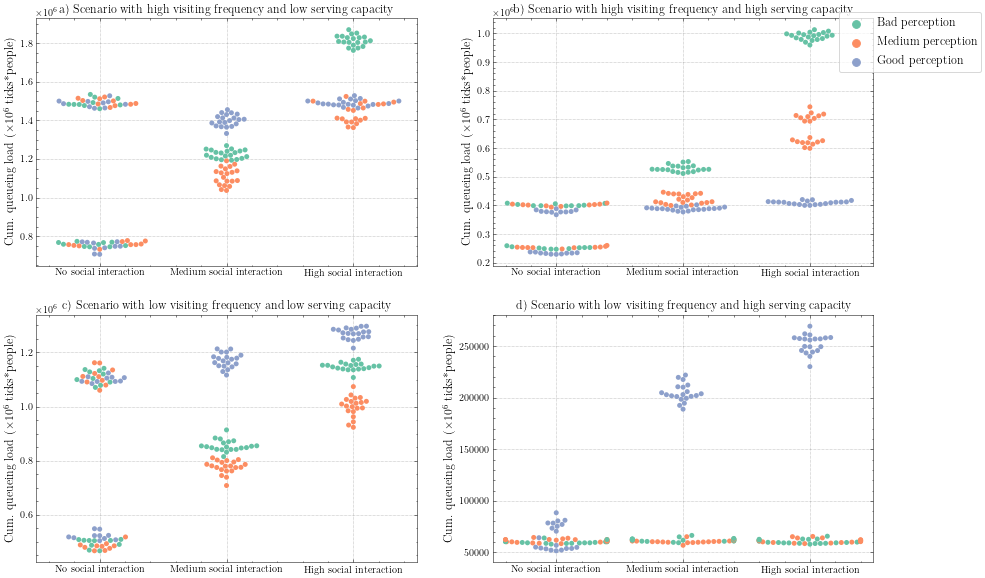

In [123]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()

for j in input_vars_batch.index:   
    uc_endvals_dict["ticks*people"].append( q_sum[j] )

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="ticks*people", data=tmp2,hue='epsilon',palette='Set2')#palette=my_palette['dark'])
#         sns.violinplot(ax=ax[g,s], x="beta", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        
        ax[g,s].set_ylabel(r"Cum. queueing load ($\times 10^6$ ticks*people)",fontsize=12);
        ax[g,s].set_xlabel(None,fontsize=12)
        handles = ax[g,s].get_legend_handles_labels()[0]
        ax[g,s].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
        ax[g,s].yaxis.grid(True) # Hide the horizontal gridlines
        ax[g,s].xaxis.grid(True) # Show the vertical gridlines
        ax[g,s].get_legend().remove()
        

ax[0,0].set_title("a) Scenario with high visiting frequency and low serving capacity")
ax[0,1].set_title("b) Scenario with high visiting frequency and high serving capacity")
ax[1,0].set_title("c) Scenario with low visiting frequency and low serving capacity")
ax[1,1].set_title("d) Scenario with low visiting frequency and high serving capacity")
ax[0,1].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);
 

# plt.savefig("/home/daan/Desktop/queuing_onefac_epsilon_full.png")

In [104]:
# fig, ax = plt.subplots(2,2,figsize=(15,10))

# for s in range(len(scs)):
    
#     tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

#     for g in range(len(gammas)):

#         tmp2 = tmp[tmp.gamma==gammas[g]]
#         sns.swarmplot(ax=ax[g,s] ,x="beta", y="ticks*people", data=tmp2,hue='alpha',palette='Dark2')#palette=my_palette['dark'])
# #         sns.violinplot(ax=ax[g,s], x="beta", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        
#         ax[g,s].set_ylabel("Ticks * people",fontsize=12);
#         ax[g,s].set_xlabel(None,fontsize=12)
#         handles = ax[g,s].get_legend_handles_labels()[0]
#         ax[g,s].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
#         ax[g,s].yaxis.grid(True) # Hide the horizontal gridlines
#         ax[g,s].xaxis.grid(True) # Show the vertical gridlines
#         ax[g,s].get_legend().remove()
        

# ax[0,0].set_title("a) Scenario with high visiting frequency and low serving capacity")
# ax[0,1].set_title("b) Scenario with high visiting frequency and high serving capacity")
# ax[1,0].set_title("c) Scenario with low visiting frequency and low serving capacity")
# ax[1,1].set_title("d) Scenario with low visiting frequency and high serving capacity")
# ax[0,1].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);
 

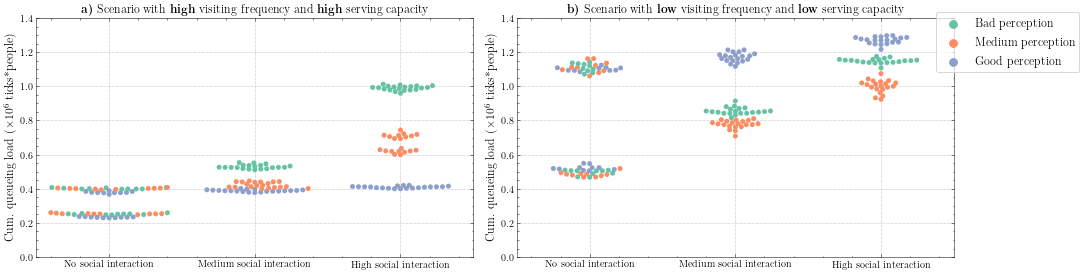

In [124]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="ticks*people", data=tmp2,hue='epsilon',palette='Set2')#palette=my_palette['dark'])
#     sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,1.4e6])
    ax[i].set_ylabel(r"Cum. queueing load ($\times 10^6$ ticks*people)",fontsize=12);
    
    ax[i].set_xlabel(None)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
    handles = ax[i].get_legend_handles_labels()[0]
    ax[i].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
    ax[i].set_yticklabels(np.round(np.linspace(0,1.4,8),1))
    ax[i].yaxis.grid(True) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines
    ax[i].get_legend().remove()

ax[i].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);

ax[0].set_title(r"\textbf{a)} Scenario with \textbf{high} visiting frequency and \textbf{high} serving capacity")
ax[1].set_title(r"\textbf{b)} Scenario with \textbf{low} visiting frequency and \textbf{low} serving capacity")
fig.tight_layout() 

plt.savefig("/home/daan/Desktop/scenariodiscovery_allfacs_epsilon.png")

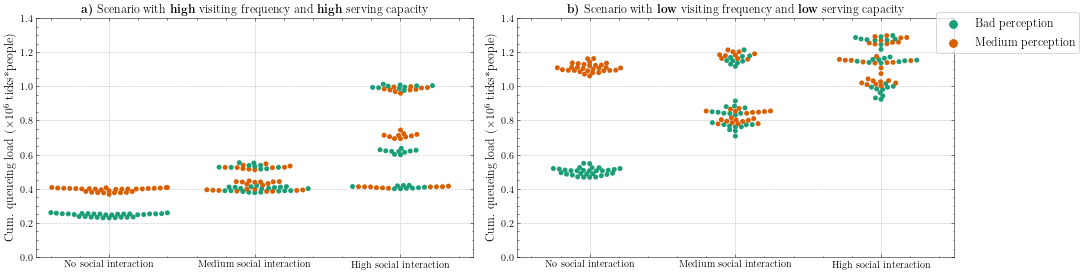

In [125]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="ticks*people", data=tmp2,hue='alpha',palette='Dark2')#palette=my_palette['dark'])
#     sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,1.4e6])
    ax[i].set_ylabel(r"Cum. queueing load ($\times 10^6$ ticks*people)",fontsize=12);
    
    ax[i].set_xlabel(None)
#         ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
    handles = ax[i].get_legend_handles_labels()[0]
    ax[i].set_xticklabels(["No social interaction","Medium social interaction","High social interaction"])
    ax[i].set_yticklabels(np.round(np.linspace(0,1.4,8),1))
    ax[i].yaxis.grid(True) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines
    ax[i].get_legend().remove()

ax[i].legend(handles[:3], ["Bad perception", "Medium perception", "Good perception"],loc='upper right',fontsize=12,bbox_to_anchor=(1.3, 1.05),framealpha=0.75);

ax[0].set_title(r"\textbf{a)} Scenario with \textbf{high} visiting frequency and \textbf{high} serving capacity")
ax[1].set_title(r"\textbf{b)} Scenario with \textbf{low} visiting frequency and \textbf{low} serving capacity")
fig.tight_layout() 

plt.savefig("/home/daan/Desktop/scenariodiscovery_allfacs_alpha.png")